<a href="https://colab.research.google.com/github/SuhaniShah008/Titanic-Survival/blob/main/Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# README.md
This project was created to show different models used to predict the Titanic survivors based on a spreadsheet containing data.


---


I first analyzed each category to find out what to do with the different data given, such as null boxes in different categories.
After doing a multivariate analysis, I went on and created a model using  a Decision Tree Classifier

In [ ]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=30):
    # Create the 2 subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Boxplot
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="#00A1F2"
    )  # boxplot will be created and a triangle will indicate the mean value of the column

    # Histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="#00D5BA"
    )

    # Adding mean and median lines to the histogram
    ax_hist2.axvline(
        data[feature].mean(), color="#FF66FF", linestyle="--", label='Mean'
    )
    ax_hist2.axvline(
        data[feature].median(), color="#FF66FF", linestyle="-", label='Median'
    )

    # Setting the same x-axis limits for both plots
    xmin = data[feature].min()
    xmax = data[feature].max()
    ax_hist2.set_xlim(xmin, xmax)

    # Adding legend to histogram
    ax_hist2.legend()

    # Display the plot
    plt.show()

In [ ]:
def distro_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # Changed to 1 row, 2 columns

    target_uniq = data[target].unique()

    axs[0].set_title("KDE Plot of predictor for target=0 and target=1")
    sns.kdeplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        ax=axs[0],
        color="#00A1F2",
        label=f"target={target_uniq[0]}"
    )
    sns.kdeplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        ax=axs[0],
        color="#00D5BA",
        label=f"target={target_uniq[1]}"
    )
    axs[0].legend()

    axs[1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1],
        showfliers=False,
        hue=target,
        palette=["#00A1F2", "#00D5BA"],
        legend=False
    )

    plt.tight_layout()
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/Colab/train.csv'
df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Colab/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=5, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)


(569, 5) (143, 5) (179, 5)


In [ ]:
train_data.shape

(891, 12)

In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


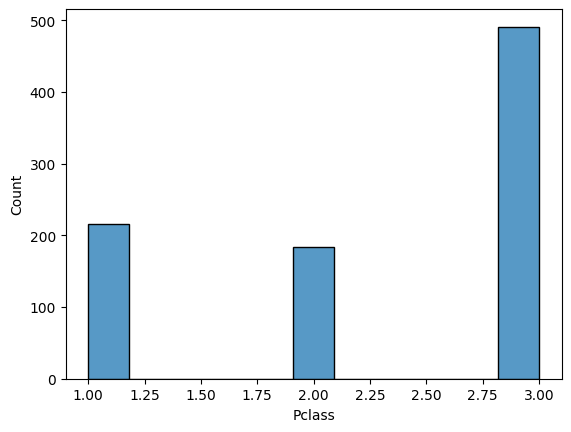

In [ ]:
sns.histplot(data=train_data, x='Pclass')
plt.show()

In [ ]:
train_data.groupby(['Pclass'])[['Survived']].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
train_data.groupby(['Pclass'])[['Survived']].sum()

,Survived
Pclass,
1,136
2,87
3,119


In [ ]:
data = df.copy()

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
cat_columns = data.select_dtypes(exclude=np.number).columns
cat_columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
# print the number of occurrences of each unique value in each categorical column
for column in cat_columns:
    print(data[column].value_counts())
    print("-" * 50)

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
--------------------------------------------------
Sex
male      577
female    314
Name: count, dtype: int64
--------------------------------------------------
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
--------------------------------------------------
Cabin
B96 B98        4
G6             4

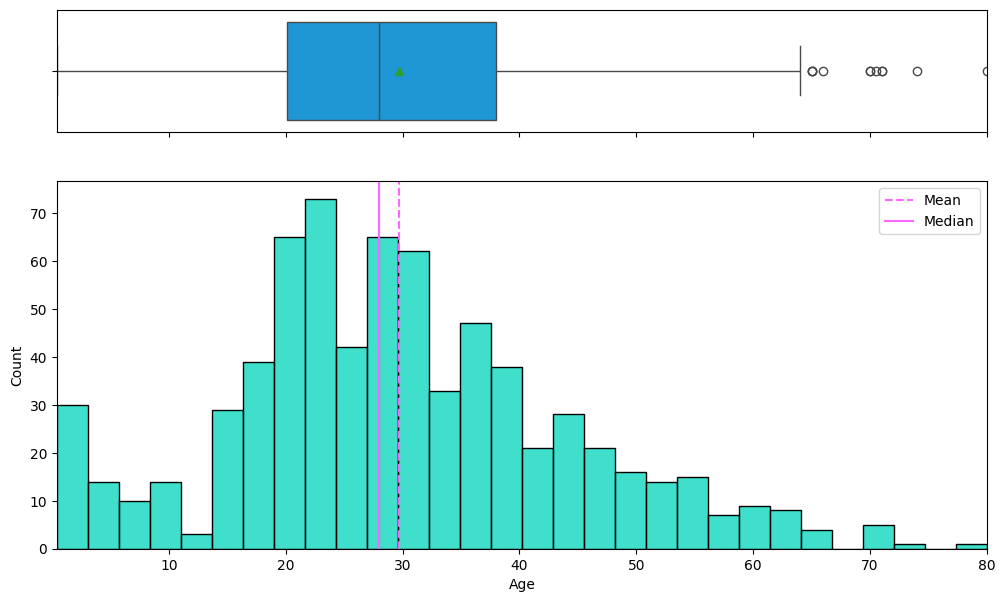

In [ ]:
histogram_boxplot(data, 'Age')

In [ ]:
#copy for replace missing age to median
data2= df.copy()

In [ ]:
#copy for replace missing age with null variable
data3= df.copy()

In [ ]:
print("Null values before:", data3['Age'].isnull().sum())


Null values before: 177


In [ ]:
# Calculate the median of the 'age' column, ignoring NaN values
median_age = data3['Age'].median()

# Replace null values with the median
data3['Age'].fillna(median_age, inplace=True)

# Verify that null values are replaced
print("Null values after:", data3['Age'].isnull().sum())


Null values after: 0


<ipython-input-11-916163878e46>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data3['Age'].fillna(median_age, inplace=True)


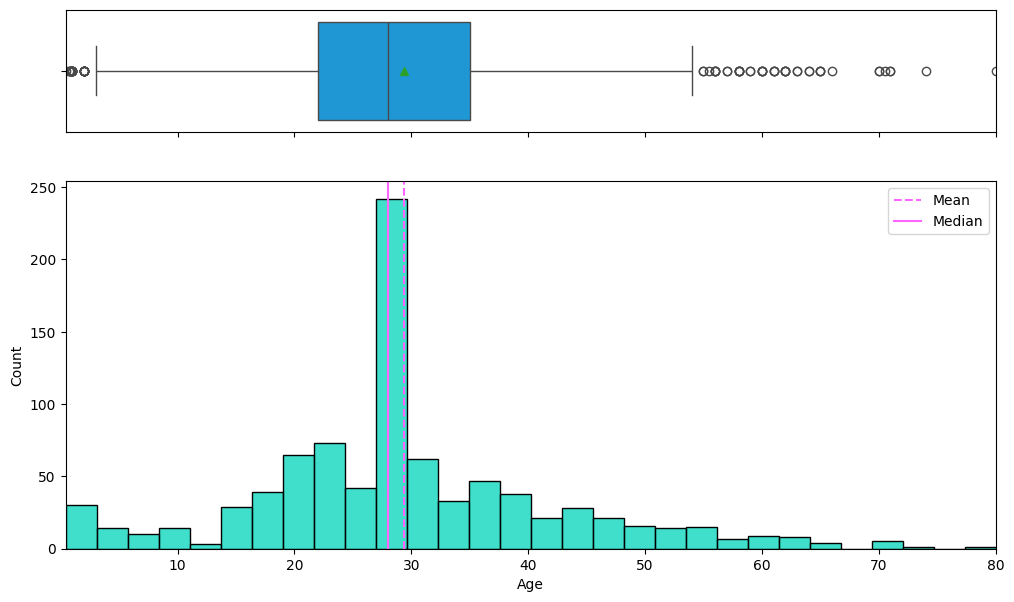

In [ ]:
histogram_boxplot(data3,'Age')

In [ ]:
data4= df.copy()

In [ ]:
# change all male into 1 and change all female into two
data4['Sex'] = data4['Sex'].map({'male': 1, 'female': 0})

# Verify the changes
print(data4['Sex'].head())

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64


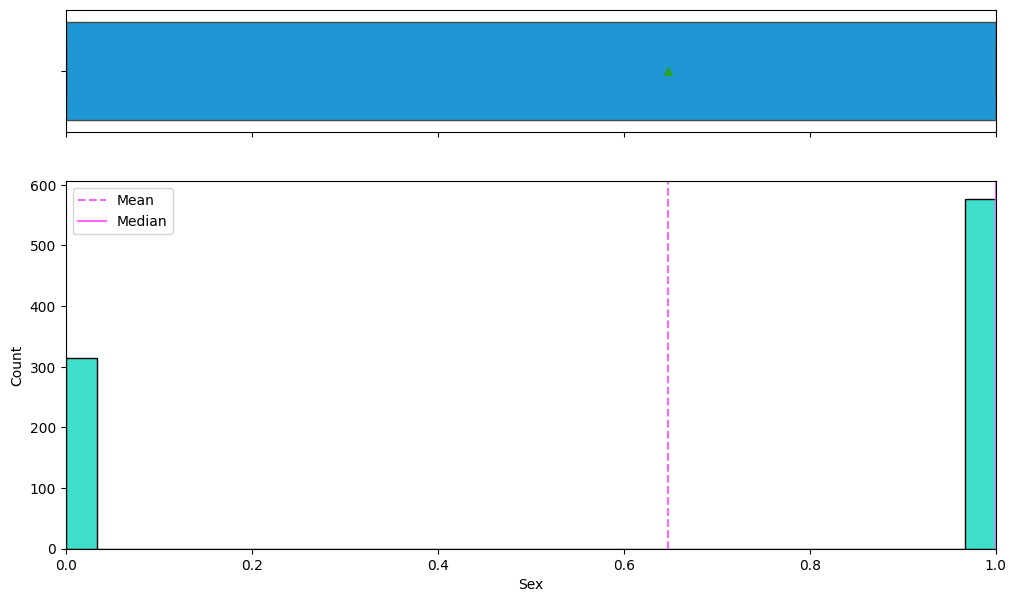

In [ ]:
histogram_boxplot(data4,'Sex')

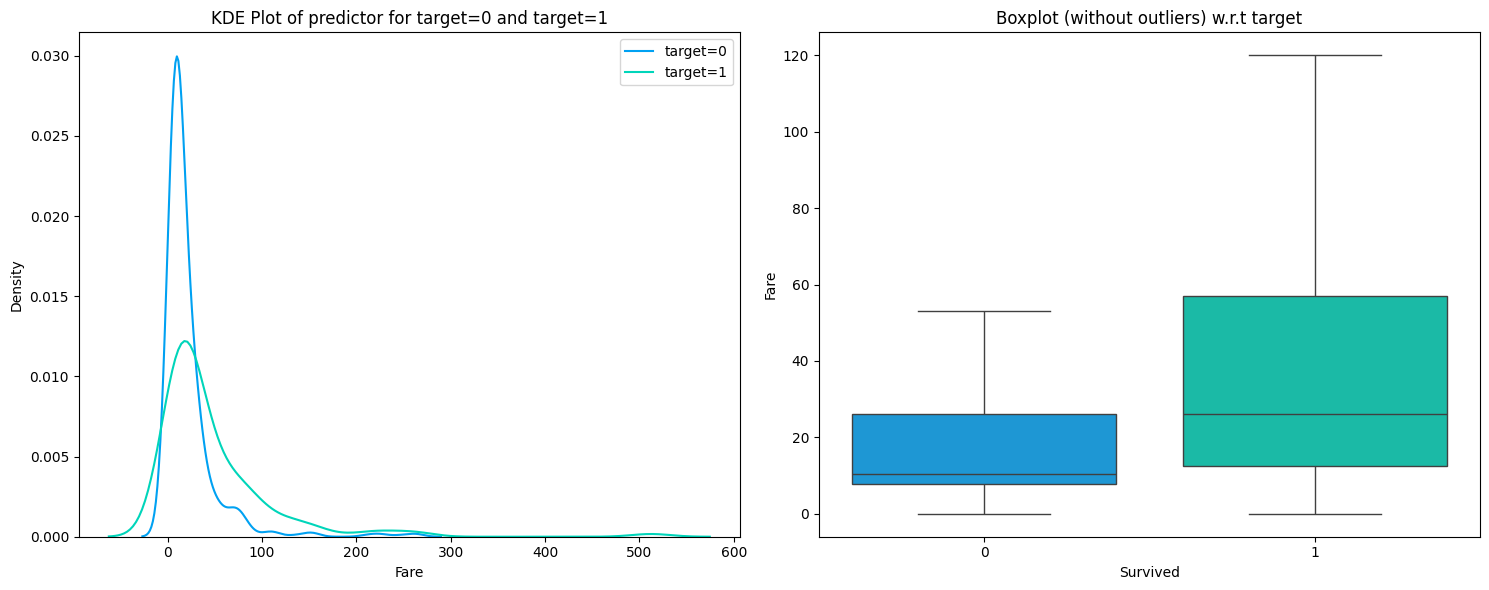

In [ ]:
distro_plot_wrt_target(data, 'Fare', 'Survived')

<ipython-input-3-c352603d6e41>:25: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


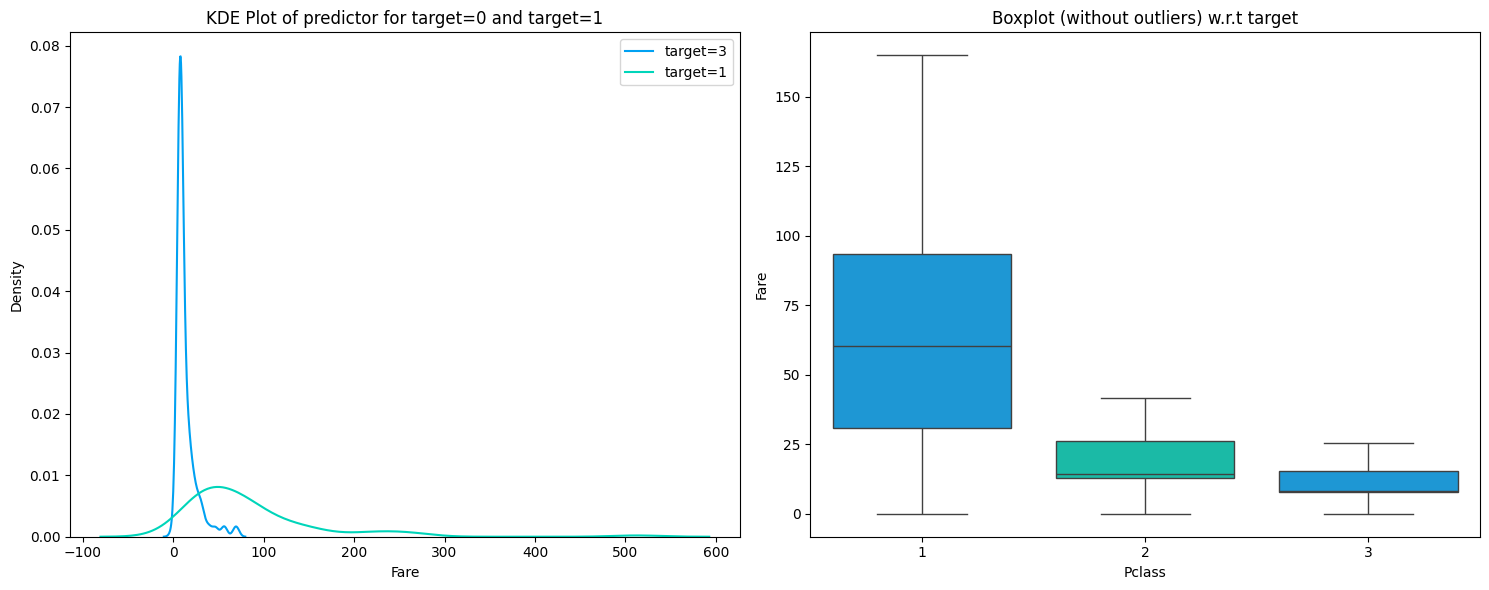

In [ ]:
distro_plot_wrt_target(data, 'Fare', 'Pclass')

      Fare  Log_Fare
0   7.2500  2.110213
1  71.2833  4.280593
2   7.9250  2.188856
3  53.1000  3.990834
4   8.0500  2.202765


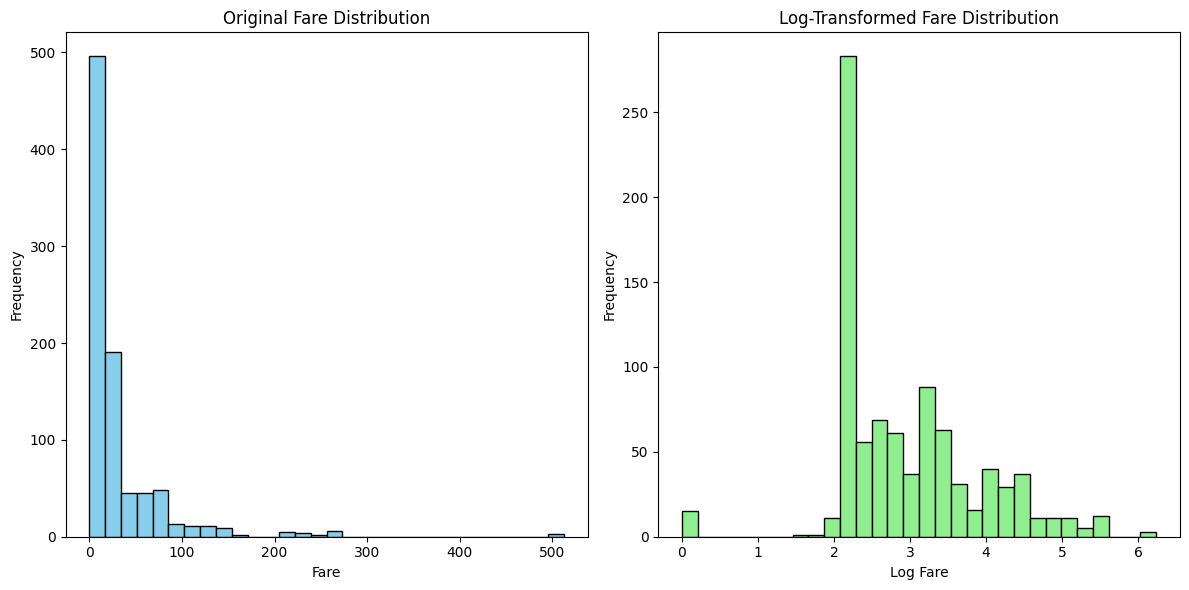

In [ ]:
data['Log_Fare'] = np.log1p(data['Fare'])

# Display the first few rows to verify the new column
print(data[['Fare', 'Log_Fare']].head())

# Plot the original and log-transformed Fare for comparison
plt.figure(figsize=(12, 6))

# Plotting the original 'Fare' distribution
plt.subplot(1, 2, 1)
plt.hist(data['Fare'], bins=30, edgecolor='k', color='skyblue')
plt.title('Original Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['Log_Fare'], bins=30, edgecolor='k', color='lightgreen')
plt.title('Log-Transformed Fare Distribution')
plt.xlabel('Log Fare')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:

X = data[['Fare']].values
y = data['Survived'].values

# Fit Decision Tree Classifier to find optimal bins
dt_model = DecisionTreeClassifier(max_leaf_nodes=5, random_state=1)
dt_model.fit(X, y)

# Get bin cut points from the decision tree
thresholds = sorted(dt_model.tree_.threshold[dt_model.tree_.threshold != -2])
print("Optimal Cutoffs for 'Fare':", thresholds)

# Create bins based on the cut points
bins = [-np.inf] + thresholds + [np.inf]
data['Fare_Binned_Tree'] = pd.cut(data['Fare'], bins=bins)

# 4. One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_bins = encoder.fit_transform(data[['Fare_Binned_Tree']])
encoded_df = pd.DataFrame(encoded_bins, columns=encoder.get_feature_names_out(['Fare_Binned_Tree']))

# Concatenate one-hot encoded variables to the original DataFrame
data = pd.concat([data, encoded_df], axis=1)

# Display the resulting DataFrame
print(data.head())

Optimal Cutoffs for 'Fare': [10.481249809265137, 52.277099609375, 69.42500305175781, 74.375]
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Log_Fare  \
0      0         A/5 21171   7.2500   NaN        S  2.110213   
1      0          PC 17599  71.2833   C85        C  4.280593   
2      0  STON/O2. 3101282   7.9250